In [121]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#print(city_data.head())
#print(ride_data.head())

# Combine the data into a single dataset
mrg_data =  pd.merge(city_data, ride_data, how = 'outer' ,on = 'city' )
mrg_data2 = mrg_data[['city','driver_count']].drop_duplicates()
#print(mrg_data2)
# Display the data table for preview
#print(mrg_data.head())

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

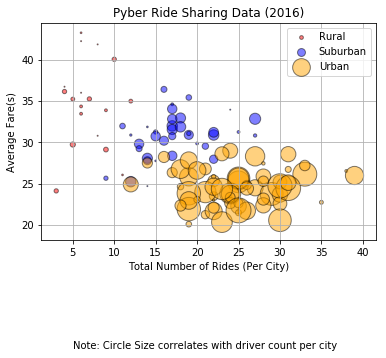

In [122]:
# Obtain the x and y coordinates for each of the three city types
grp_ct = mrg_data.groupby(['type','city'], as_index = False).agg({'fare':'mean', 'ride_id':'count'})
final  =  pd.merge(grp_ct, mrg_data2, how = 'outer' ,on = 'city' )
#print(final)
#test data
test_grp_ct_1 = final.loc[grp_ct['type'] == 'Rural']
test_grp_ct_2 = final.loc[grp_ct['type'] == 'Suburban']
test_grp_ct_3 = final.loc[grp_ct['type'] == 'Urban']
#print(grp_ct)

#print(test_grp_ct_1)
#print('############')
#print(test_grp_ct_2)
#print('############')
#print(test_grp_ct_3)

#test_grp_ct_4 = test_grp_ct_1.append(test_grp_ct_2)
#test_grp_ct_4 = test_grp_ct_4.append(test_grp_ct_3)
#print(test_grp_ct_4)

# Build the scatter plots for each city types
plt.scatter(test_grp_ct_1['ride_id'],test_grp_ct_1['fare'], s=test_grp_ct_1['driver_count'] **1.5, edgecolor = 'black', alpha = 0.5, facecolors = 'red')
plt.scatter(test_grp_ct_2['ride_id'],test_grp_ct_2['fare'], s=test_grp_ct_2['driver_count'] **1.5, edgecolor = 'black', alpha = 0.5, facecolors = 'blue')
plt.scatter(test_grp_ct_3['ride_id'],test_grp_ct_3['fare'], s=test_grp_ct_3['driver_count'] **1.5, edgecolor = 'black', alpha = 0.5, facecolors = 'orange')


plt.ylabel('Average Fare(s)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(labels= ('Rural', 'Suburban', 'Urban'))
txtbox1 = plt.text( 5, 5, 'Note: Circle Size correlates with driver count per city')
plt.show()

# Incorporate the other graph properties


# Create a legend


# Incorporate a text label regarding circle size


# Save Figure



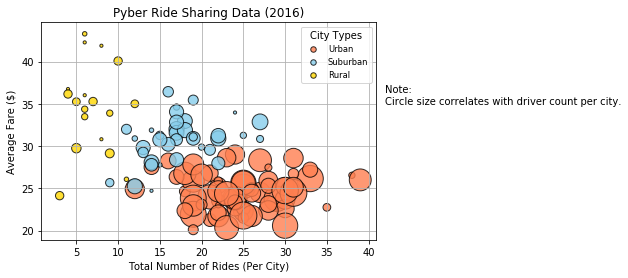

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

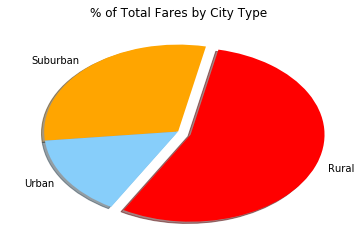

In [148]:
# Calculate Type Percents
ct = final.groupby(['type']).agg({'type':'count'})
ct.columns = ['count']
dt = ct.reset_index()
tot = dt['count'].sum()
urbpct = ct['count'][2]/tot
surbpct = ct['count'][1]/tot
rurpct = ct['count'][0]/tot

#print(rurpct)
# Build Pie Chart
plt.pie([urbpct,surbpct,rurpct],explode = (0.1, 0, 0),labels= ('Rural', 'Suburban', 'Urban'),colors = ["red", "orange", "lightskyblue"], shadow=True, startangle=240)
# Save Figure
plt.title('% of Total Fares by City Type')
#plt.axis("equal")
plt.savefig("../Images/TotalFares_byCityType.png")


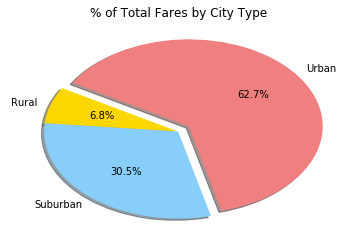

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

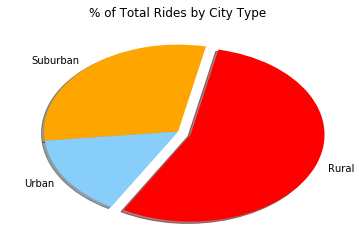

In [149]:
# Calculate Ride Percents
ct = final.groupby(['type']).agg({'ride_id':'count'})
ct.columns = ['count']
dt = ct.reset_index()
tot = dt['count'].sum()
urbpct = ct['count'][2]/tot
surbpct = ct['count'][1]/tot
rurpct = ct['count'][0]/tot
# Build Pie Chart
plt.pie([urbpct,surbpct,rurpct],explode = (0.1, 0, 0),labels= ('Rural', 'Suburban', 'Urban'),colors = ["red", "orange", "lightskyblue"], shadow=True, startangle=240)

# Save Figure
plt.title('% of Total Rides by City Type')
#plt.axis("equal")
plt.savefig("../Images/TotalRides_byCityType.png")

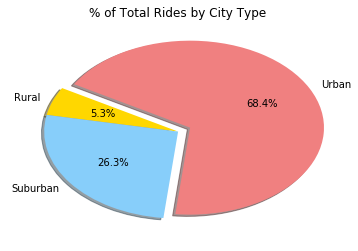

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
plt.title('% of Total Drivers by City Type')
#plt.axis("equal")
plt.savefig("../Images/TotalDrivers_byCityType.png")

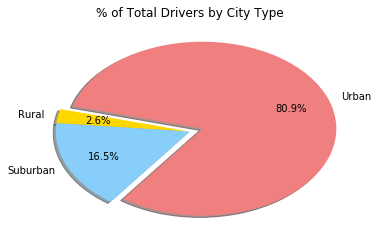

In [6]:
# Show Figure
plt.show()